In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import metrics

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
sns.set(color_codes=True)

In [5]:
ds=pd.read_csv('pima-indians-diabetes-1.csv')

In [6]:
ds.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
ds.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
ds.shape

(768, 9)

In [11]:
ds.isnull().values.any()

False

In [12]:
d=ds[['Plas','Pres','skin','test','mass']]=ds[['Plas','Pres','skin','test','mass']].replace(0,np.nan)
d.head()

,Plas,Pres,skin,test,mass
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [13]:
d.isnull().sum()[['Plas','Pres','skin','test','mass']]

Plas      5
Pres     35
skin    227
test    374
mass     11
dtype: int64

In [14]:
ds['Plas'].fillna(ds['Plas'].median(),inplace=True)
ds['Pres'].fillna(ds['Pres'].median(),inplace=True)
ds['skin'].fillna(ds['skin'].median(),inplace=True)
ds['test'].fillna(ds['test'].median(),inplace=True)
ds['mass'].fillna(ds['mass'].median(),inplace=True)
ds.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
ds.groupby('class').size()

class
0    500
1    268
dtype: int64

C:\Users\bveer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

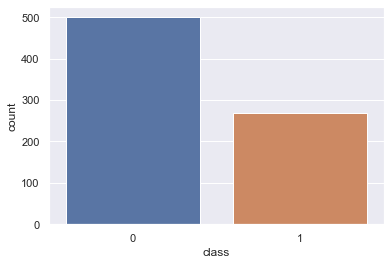

In [16]:
sns.countplot(ds['class'])

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>,
        <AxesSubplot:title={'center':'Pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

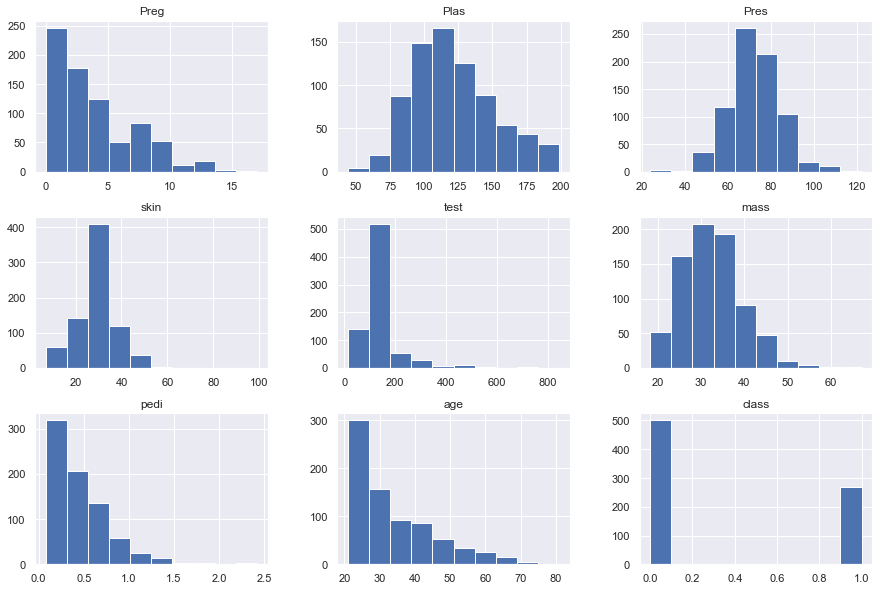

In [17]:
ds.hist(figsize=(15,10))

In [18]:
fig, ax2=plt.subplot(4, 2, figsize=(16,16))
sns.set(font_scale = 1)
sns.displot(ds['Preg'],ax=ax2[0][0])
sns.displot(ds['Plas'],ax=ax2[0][1])
sns.displot(ds['Pres'],ax=ax2[1][0])
sns.displot(ds['skin'],ax=ax2[1][1])
sns.displot(ds['test'],ax=ax2[2][0])
sns.displot(ds['mass'],ax=ax2[2][1])
sns.displot(ds['pedi'],ax=ax2[3][0])
sns.displot(ds['age'],ax=ax2[3][1])

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

C:\Users\bveer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bveer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bveer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bveer\anaconda3\lib\si

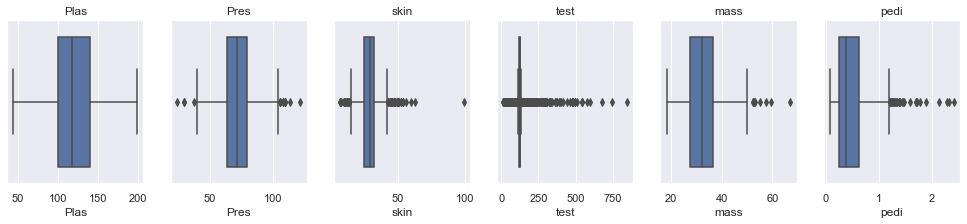

In [19]:
fig=plt.figure(figsize=(20,3))
for i in np.arange(1,7):
    d3=plt.subplot(1,7,i,title=ds.columns[i])
    sns.boxplot(ds[ds.columns[i]])

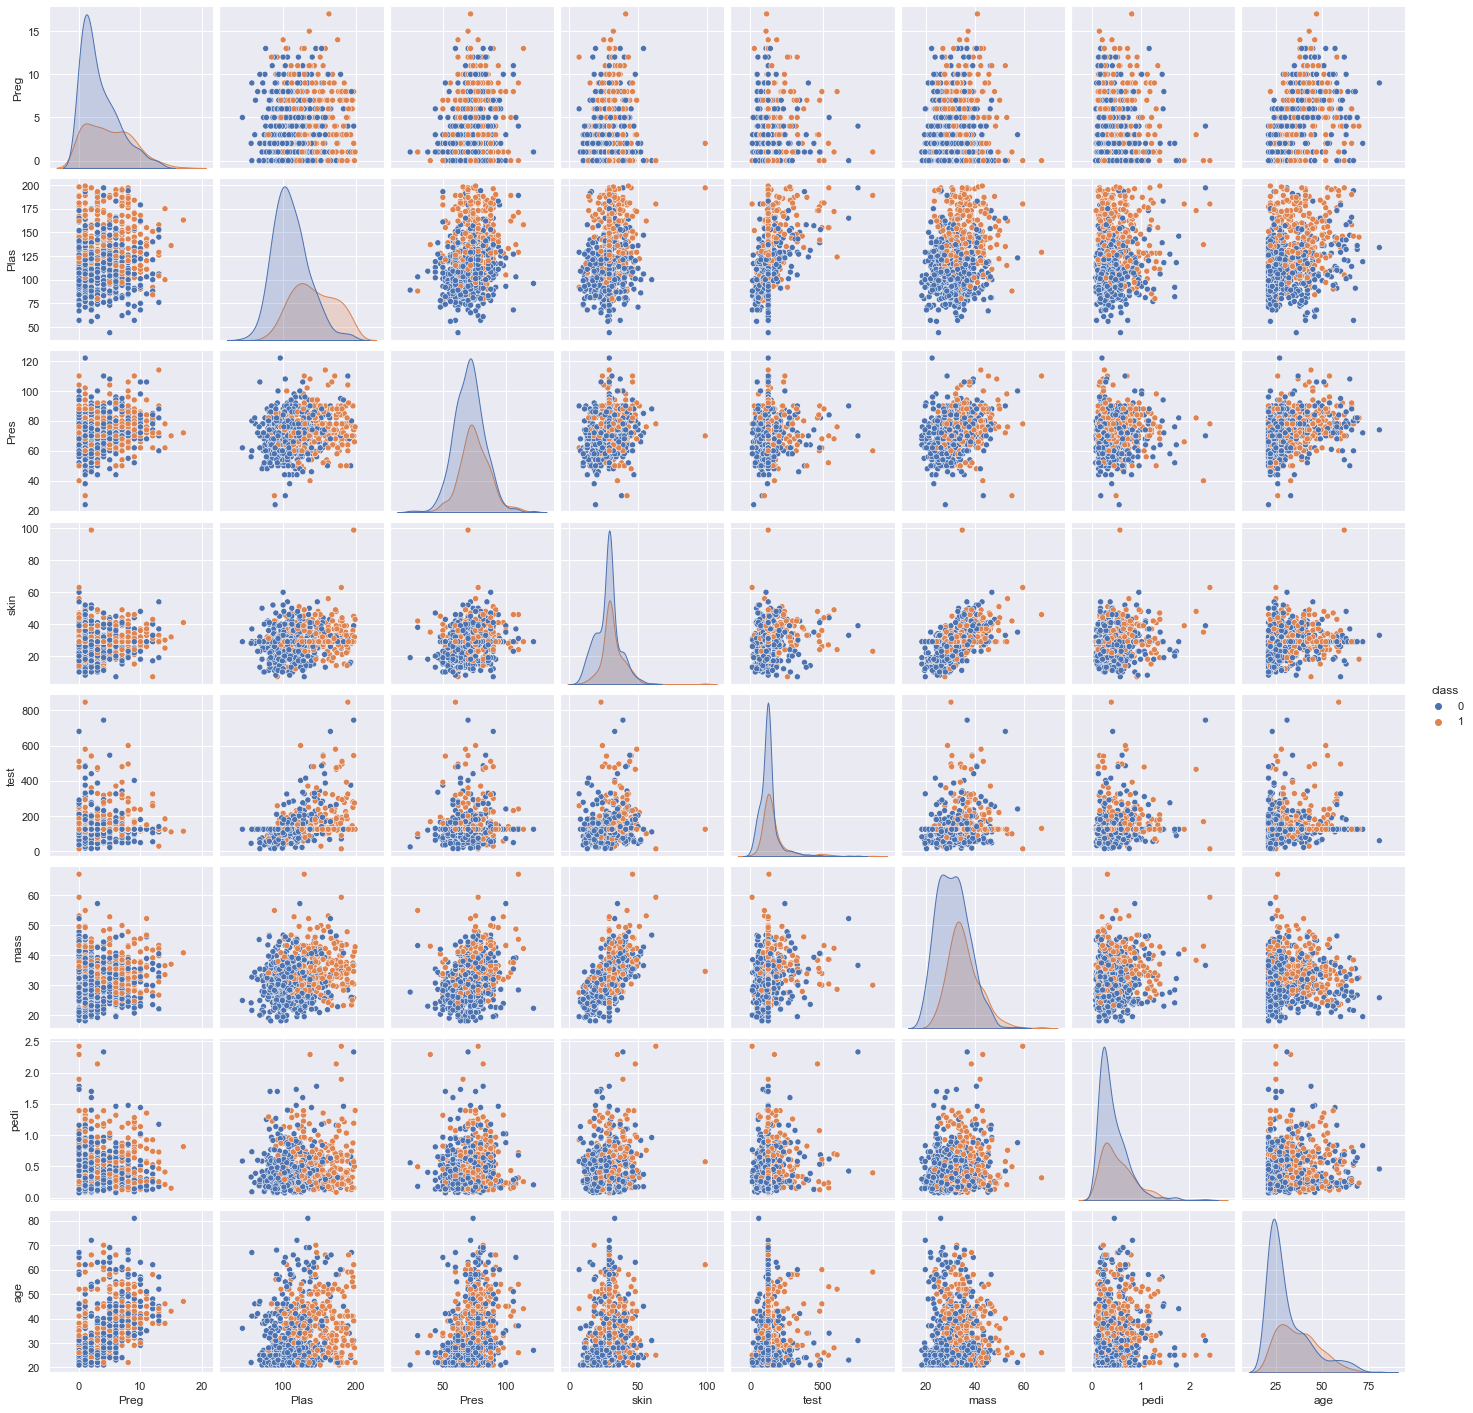

In [20]:
sns.pairplot(ds,hue='class')

In [21]:
cor=ds.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

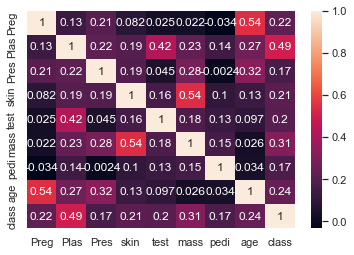

In [22]:
sns.heatmap(cor,annot=True)

In [23]:
def age(df):
    df.loc[(df['age']>20)&(df['age']<=41),'age']=1
    df.loc[(df['age']>42)&(df['age']<=61),'age']=2
    df.loc[(df['age']>62)&(df['age']<=81),'age']=3
    return df
age(ds)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,2,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,3,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,1,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,1,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,2,1


In [24]:
X=ds.loc[:,ds.columns!='class']
y=ds.loc[:,ds.columns=='class']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

In [26]:
scalar=StandardScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

In [27]:
Ov_sampling=SMOTE(random_state=0)
ov_data_X,ov_data_y=Ov_sampling.fit_resample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(data=ov_data_y,columns=['class'])

In [28]:
ov_data_y['class'].value_counts()

1    343
0    343
Name: class, dtype: int64

In [29]:
model=GaussianNB()
model.fit(ov_data_X,ov_data_y)
pred=model.predict(X_test)

C:\Users\bveer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bveer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [30]:
ms=model.score(X_test,y_test)
print('model score',ms)
print('confusion matrix:\n',metrics.confusion_matrix(y_test,pred))

model score 0.7575757575757576
confusion matrix:
 [[132  25]
 [ 31  43]]


C:\Users\bveer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [31]:

print('accuracy:',metrics.accuracy_score(y_test,pred))
print('precision:',metrics.precision_score(y_test,pred))
print('recall:',metrics.recall_score(y_test,pred))
print('f-score:',metrics.f1_score(y_test,pred))

accuracy: 0.7575757575757576
precision: 0.6323529411764706
recall: 0.581081081081081
f-score: 0.6056338028169013


In [32]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.63      0.58      0.61        74

    accuracy                           0.76       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

